Loading Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn as sk
import os
import math
import time


In [0]:
# Load Dataset from GDrive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Download a file based on its file ID.
#
# Master Data
file_id_1 = '1YK4yO9uAWMx4_zaay_bktMjZ1sytYHoS'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('masterdata.csv')

# Netflix Data
file_id_2 = '1OlsxUea7sPoaV0YcfyqNLAX4vV6ZLh6e'
downloaded_2 = drive.CreateFile({'id': file_id_2})
downloaded_2.GetContentFile('netflixdata.csv')

#Top 100 Actor
file_id_3 = '1KEIJ6A4pdkEwS1hAJp7_nqiL_B7IP-5-'
downloaded_3 = drive.CreateFile({'id': file_id_3})
downloaded_3.GetContentFile('Top100Actor.csv')


In [8]:
master_data = pd.read_csv('masterdata.csv')
netflix_data = pd.read_csv('netflixdata.csv')

netflix_data = pd.merge(netflix_data, master_data, how='inner', left_on=['movie_name','year'], right_on=['primaryTitle','startYear'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
netflix_data.head()

,Unnamed: 0,movie_id,year,movie_name,customer_id,rating,date,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')","('primaryName', 'archive_footage')","('primaryName', 'archive_sound')","('primaryName', 'cinematographer')","('primaryName', 'composer')","('primaryName', 'director')","('primaryName', 'editor')","('primaryName', 'producer')","('primaryName', 'production_designer')","('primaryName', 'self')","('primaryName', 'writer')",averageRating,numVotes,Genre1,Genre2,Genre3
0,0,1,2003.0,Dinosaur Planet,1567328,4.0,2005-02-16,tt0389605,tvMiniSeries,Dinosaur Planet,Dinosaur Planet,0,2003.0,\N,50,"Animation,Documentary,Family",nm0504273,"nm4178464,nm4177463,nm0989448,nm0647431,nm0662263",Christian Slater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scott Sampson,NaN,7.7,411.0,Animation,Documentary,Family
1,1,1,2003.0,Dinosaur Planet,2091010,4.0,2005-02-10,tt0389605,tvMiniSeries,Dinosaur Planet,Dinosaur Planet,0,2003.0,\N,50,"Animation,Documentary,Family",nm0504273,"nm4178464,nm4177463,nm0989448,nm0647431,nm0662263",Christian Slater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scott Sampson,NaN,7.7,411.0,Animation,Documentary,Family
2,2,1,2003.0,Dinosaur Planet,2537219,4.0,2005-04-01,tt0389605,tvMiniSeries,Dinosaur Planet,Dinosaur Planet,0,2003.0,\N,50,"Animation,Documentary,Family",nm0504273,"nm4178464,nm4177463,nm0989448,nm0647431,nm0662263",Christian Slater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scott Sampson,NaN,7.7,411.0,Animation,Documentary,Family
3,3,1,2003.0,Dinosaur Planet,2625420,2.0,2004-11-01,tt0389605,tvMiniSeries,Dinosaur Planet,Dinosaur Planet,0,2003.0,\N,50,"Animation,Documentary,Family",nm0504273,"nm4178464,nm4177463,nm0989448,nm0647431,nm0662263",Christian Slater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scott Sampson,NaN,7.7,411.0,Animation,Documentary,Family
4,4,1,2003.0,Dinosaur Planet,955896,5.0,2005-11-28,tt0389605,tvMiniSeries,Dinosaur Planet,Dinosaur Planet,0,2003.0,\N,50,"Animation,Documentary,Family",nm0504273,"nm4178464,nm4177463,nm0989448,nm0647431,nm0662263",Christian Slater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scott Sampson,NaN,7.7,411.0,Animation,Documentary,Family


In [31]:
netflix_data.describe()

,Unnamed: 0,movie_id,year,customer_id,rating,isAdult,startYear,averageRating,numVotes
count,3.830578e+06,3.830578e+06,3.830578e+06,3.830578e+06,3.830578e+06,3.830578e+06,3.830578e+06,3.396259e+06,3.396259e+06
mean,3.497767e+06,6.743651e+02,1.989988e+03,1.322306e+06,3.609088e+00,3.032963e-03,1.989988e+03,6.723954e+00,3.959155e+04
std,2.079222e+06,4.086178e+02,1.547559e+01,7.644422e+05,1.063516e+00,5.498877e-02,1.547559e+01,1.088642e+00,1.081651e+05
min,0.000000e+00,1.000000e+00,1.921000e+03,6.000000e+00,1.000000e+00,0.000000e+00,1.921000e+03,1.600000e+00,5.000000e+00
25%,1.426051e+06,2.850000e+02,1.982000e+03,6.608710e+05,3.000000e+00,0.000000e+00,1.982000e+03,6.100000e+00,1.459000e+03
50%,3.393796e+06,6.320000e+02,1.997000e+03,1.318530e+06,4.000000e+00,0.000000e+00,1.997000e+03,6.900000e+00,4.631000e+03
75%,5.453212e+06,1.084000e+03,2.001000e+03,1.984414e+06,4.000000e+00,0.000000e+00,2.001000e+03,7.400000e+00,3.782000e+04
max,7.519932e+06,1.499000e+03,2.005000e+03,2.649429e+06,5.000000e+00,1.000000e+00,2.005000e+03,9.200000e+00,9.983260e+05


len(netflix_data)

In [32]:
# Check Granularity Duplicates
len(netflix_data)


3830578

In [10]:
netflix_data.groupby(['customer_id', 'movie_id']).ngroups

3301618

In [0]:
user_rating_cnt = netflix_data.groupby(['customer_id']).count()[['movie_id']]

In [35]:
user_rating_cnt.head()

,movie_id
customer_id,
6,22
7,25
8,3
10,9
25,1


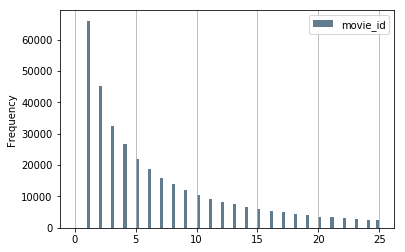

In [36]:
import matplotlib.pyplot as plt
# Histogram on # of ratings per user
user_rating_cnt.plot.hist(grid=True, bins=100,color='#607c8e', range=[0, 25])
plt.grid(axis='y')

In [0]:
sample = netflix_data.sample(n=1000000, random_state=1)

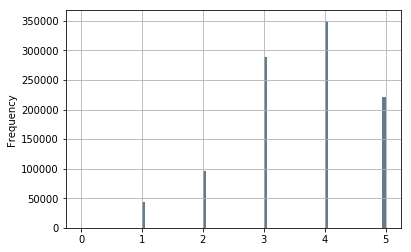

In [12]:
sample['rating'].plot.hist(grid=True, bins=100,color='#607c8e', range=[0, 5])

In [0]:
grouped_data = sample.groupby(['customer_id']).count()[['movie_id']]

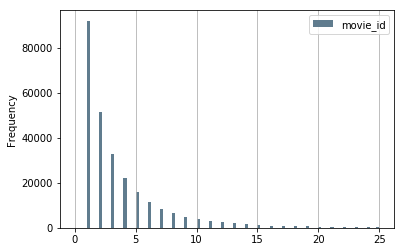

In [39]:
import matplotlib.pyplot as plt
# Histogram on # of ratings per user
grouped_data.plot.hist(grid=True, bins=100,color='#607c8e', range=[0, 25])
plt.grid(axis='y')

In [0]:
#Don't filter by review count
#users_morethan_1rating = grouped_data.filter(lambda x: len(x) > 1)

In [0]:

#user_rating_cnt2 = users_morethan_1rating.groupby(['customer_id']).count()[['movie_id']]

In [0]:
#user_rating_cnt2.plot.hist(grid=True, bins=100,color='#607c8e', range=[0, 25])
#plt.grid(axis='y')

In [40]:
#Count total users
len(grouped_data)

266871

In [41]:
sample.head()

,Unnamed: 0,movie_id,year,movie_name,customer_id,rating,date,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')","('primaryName', 'archive_footage')","('primaryName', 'archive_sound')","('primaryName', 'cinematographer')","('primaryName', 'composer')","('primaryName', 'director')","('primaryName', 'editor')","('primaryName', 'producer')","('primaryName', 'production_designer')","('primaryName', 'self')","('primaryName', 'writer')",averageRating,numVotes,Genre1,Genre2,Genre3
3712672,7019337,1395,1963.0,Charade,943667,5.0,2004-01-16,tt0056923,movie,Charade,Charade,0,1963.0,\N,113,"Comedy,Mystery,Romance",nm0002045,"nm0832099,nm0066939","Cary Grant,Walter Matthau,James Coburn",Audrey Hepburn,NaN,NaN,Charles Lang,Henry Mancini,Stanley Donen,Jim Clark,NaN,NaN,NaN,"Peter Stone,Marc Behm",7.9,61058.0,Comedy,Mystery,Romance
3826701,7516056,1499,2000.0,FLCL,1632247,3.0,2003-03-21,tt0279077,tvMiniSeries,FLCL,FLCL,0,2000.0,2018,151,"Action,Animation,Comedy","nm0875453,nm1536195,nm1532888,nm1535757,nm2674148","nm0257939,nm0875453","Suzuki Matsuo,Hiroshi Ito,Kazuhito Suzuki,Sho ...","Chiemi Chiba,Jun Mizuki,Mayumi Shintani,Izumi ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2,13713.0,Action,Animation,Comedy
1910425,3388932,632,1972.0,Shaft's Big Score!,2089599,4.0,2004-01-24,tt0069257,movie,Shaft's Big Score!,Shaft's Big Score!,0,1972.0,\N,104,"Action,Crime,Drama",nm0662953,nm0862781,"Richard Roundtree,Moses Gunn,Drew Bundini Brow...",NaN,NaN,NaN,Urs Furrer,NaN,Gordon Parks,Moe Howard,Roger H. Lewis,NaN,NaN,Ernest Tidyman,6.1,2353.0,Action,Crime,Drama
339014,800726,171,1957.0,Funny Face,952078,3.0,2005-05-26,tt0050419,movie,Funny Face,Funny Face,0,1957.0,\N,103,"Comedy,Musical,Romance",nm0002045,nm0314826,"Robert Flemyng,Fred Astaire,Michel Auclair","Audrey Hepburn,Kay Thompson",NaN,NaN,Ray June,NaN,Stanley Donen,Frank Bracht,Roger Edens,NaN,NaN,Leonard Gershe,7.0,24221.0,Comedy,Musical,Romance
3084757,5852482,1137,2004.0,Artie Lange: It's the Whiskey Talkin',1568315,2.0,2004-12-05,tt0432719,video,Artie Lange: It's the Whiskey Talkin',Artie Lange: It's the Whiskey Talkin',0,2004.0,\N,47,"Comedy,Documentary",\N,nm0005119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maisie Weissman,"Matthew Levine,Dan Mer,Marla Ratner,Max Weissman",NaN,Artie Lange,NaN,6.9,186.0,Comedy,Documentary,NaN


In [0]:
data = sample

In [43]:
data['primaryTitle'].nunique()

798

In [44]:
#Count total reviews
len(data)

1000000

In [19]:
#Begin Feature Engineering
#Create basic customer history columns

#Genres watched and average rating for each genre

data2 = data
list(data2)

['Unnamed: 0',
 'movie_id',
 'year',
 'movie_name',
 'customer_id',
 'rating',
 'date',
 'tconst',
 'titleType',
 'primaryTitle',
 'originalTitle',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'genres',
 'directors',
 'writers',
 "('primaryName', 'actor')",
 "('primaryName', 'actress')",
 "('primaryName', 'archive_footage')",
 "('primaryName', 'archive_sound')",
 "('primaryName', 'cinematographer')",
 "('primaryName', 'composer')",
 "('primaryName', 'director')",
 "('primaryName', 'editor')",
 "('primaryName', 'producer')",
 "('primaryName', 'production_designer')",
 "('primaryName', 'self')",
 "('primaryName', 'writer')",
 'averageRating',
 'numVotes',
 'Genre1',
 'Genre2',
 'Genre3']

In [16]:
netflix_data['Genre1'].value_counts()

Comedy         1096667
Drama           846187
Action          724689
Crime           203626
Horror          181811
Documentary     171080
Animation       138886
Adventure       112392
\N               82225
Biography        68115
Talk-Show        49985
Family           46335
Music            42672
Short            20853
Thriller         11049
Western           8627
Adult             8279
Romance           7956
Sci-Fi            5950
Reality-TV        1870
Fantasy            632
Mystery            509
News               183
Name: Genre1, dtype: int64

In [0]:
keep = ['Drama',
'Comedy',
'Romance',
'Action',
'Crime',
'Thriller',
'Horror',
'Adventure',
'Mystery',
'Animation',
'Short',
'Family']

group1 = ['Western',
'Talk-Show',
'Film-Noir',
'Adult',
'Sport',
'Reality-TV',
'News',
'Game-Show']

group2 = ['War',
'History',
'Biography',
'Documentary']

group3 = ['Music',
'Musical']

group4 = ['Fantasy',
'Sci-Fi']

In [0]:
data2.loc[data2['Genre1'].isin(group1), 'Genre1'] = 'Misc'
data2.loc[data2['Genre1'].isin(group2), 'Genre1'] = 'NonFiction'
data2.loc[data2['Genre1'].isin(group3), 'Genre1'] = 'Music'
data2.loc[data2['Genre1'].isin(group4), 'Genre1'] = 'Fantasy_SciFi'

data2.loc[data2['Genre2'].isin(group1), 'Genre2'] = 'Misc'
data2.loc[data2['Genre2'].isin(group2), 'Genre2'] = 'NonFiction'
data2.loc[data2['Genre2'].isin(group3), 'Genre2'] = 'Music'
data2.loc[data2['Genre2'].isin(group4), 'Genre2'] = 'Fantasy_SciFi'

data2.loc[data2['Genre3'].isin(group1), 'Genre3'] = 'Misc'
data2.loc[data2['Genre3'].isin(group2), 'Genre3'] = 'NonFiction'
data2.loc[data2['Genre3'].isin(group3), 'Genre3'] = 'Music'
data2.loc[data2['Genre3'].isin(group4), 'Genre3'] = 'Fantasy_SciFi'




In [21]:
data2.head(100)

,Unnamed: 0,movie_id,year,movie_name,customer_id,rating,date,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')","('primaryName', 'archive_footage')","('primaryName', 'archive_sound')","('primaryName', 'cinematographer')","('primaryName', 'composer')","('primaryName', 'director')","('primaryName', 'editor')","('primaryName', 'producer')","('primaryName', 'production_designer')","('primaryName', 'self')","('primaryName', 'writer')",averageRating,numVotes,Genre1,Genre2,Genre3
3712672,7019337,1395,1963.0,Charade,943667,5.0,2004-01-16,tt0056923,movie,Charade,Charade,0,1963.0,\N,113,"Comedy,Mystery,Romance",nm0002045,"nm0832099,nm0066939","Cary Grant,Walter Matthau,James Coburn",Audrey Hepburn,NaN,NaN,Charles Lang,Henry Mancini,Stanley Donen,Jim Clark,NaN,NaN,NaN,"Peter Stone,Marc Behm",7.9,61058.0,Comedy,Mystery,Romance
3826701,7516056,1499,2000.0,FLCL,1632247,3.0,2003-03-21,tt0279077,tvMiniSeries,FLCL,FLCL,0,2000.0,2018,151,"Action,Animation,Comedy","nm0875453,nm1536195,nm1532888,nm1535757,nm2674148","nm0257939,nm0875453","Suzuki Matsuo,Hiroshi Ito,Kazuhito Suzuki,Sho ...","Chiemi Chiba,Jun Mizuki,Mayumi Shintani,Izumi ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2,13713.0,Action,Animation,Comedy
1910425,3388932,632,1972.0,Shaft's Big Score!,2089599,4.0,2004-01-24,tt0069257,movie,Shaft's Big Score!,Shaft's Big Score!,0,1972.0,\N,104,"Action,Crime,Drama",nm0662953,nm0862781,"Richard Roundtree,Moses Gunn,Drew Bundini Brow...",NaN,NaN,NaN,Urs Furrer,NaN,Gordon Parks,Moe Howard,Roger H. Lewis,NaN,NaN,Ernest Tidyman,6.1,2353.0,Action,Crime,Drama
339014,800726,171,1957.0,Funny Face,952078,3.0,2005-05-26,tt0050419,movie,Funny Face,Funny Face,0,1957.0,\N,103,"Comedy,Musical,Romance",nm0002045,nm0314826,"Robert Flemyng,Fred Astaire,Michel Auclair","Audrey Hepburn,Kay Thompson",NaN,NaN,Ray June,NaN,Stanley Donen,Frank Bracht,Roger Edens,NaN,NaN,Leonard Gershe,7.0,24221.0,Comedy,Music,Romance
3084757,5852482,1137,2004.0,Artie Lange: It's the Whiskey Talkin',1568315,2.0,2004-12-05,tt0432719,video,Artie Lange: It's the Whiskey Talkin',Artie Lange: It's the Whiskey Talkin',0,2004.0,\N,47,"Comedy,Documentary",\N,nm0005119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maisie Weissman,"Matthew Levine,Dan Mer,Marla Ratner,Max Weissman",NaN,Artie Lange,NaN,6.9,186.0,Comedy,NonFiction,NaN
312847,774559,171,1957.0,Funny Face,1270639,4.0,2004-12-19,tt0050419,movie,Funny Face,Funny Face,0,1957.0,\N,103,"Comedy,Musical,Romance",nm0002045,nm0314826,"Robert Flemyng,Fred Astaire,Michel Auclair","Audrey Hepburn,Kay Thompson",NaN,NaN,Ray June,NaN,Stanley Donen,Frank Bracht,Roger Edens,NaN,NaN,Leonard Gershe,7.0,24221.0,Comedy,Music,Romance
1293384,2107486,380,1992.0,Live Wire,95431,4.0,2005-08-12,tt5004952,tvSeries,Live Wire,Live Wire,0,1992.0,\N,28,Talk-Show,"nm7583512,nm7685084,nm6337143,nm7583427,nm8773...",nm6002257,Ron Cooper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Don Henkle,Ray Tatar,Gary Martin,Martin Anaya,...",NaN,NaN,NaN,Misc,NaN,NaN
938691,1398542,273,2004.0,Taxi,2177071,5.0,2005-05-30,tt5741608,tvEpisode,Taxi,Taxi,0,2004.0,\N,\N,Drama,\N,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utt,NaN,NaN,NaN,Drama,NaN,NaN
3500648,6405733,1238,1984.0,The Pope of Greenwich Village,448137,5.0,2004-09-27,tt0087932,movie,The Pope of Greenwich Village,The Pope of Greenwich Village,0,1984.0,\N,121,"Action,Comedy,Crime",nm0742341,nm0665932,"Eric Roberts,Mickey Rourke","Daryl Hannah,Geraldine Page",NaN,NaN,John Bailey,Dave Grusin,Stuart Rosenberg,NaN,"Gene Kirkwood,Hawk Koch",NaN,NaN,Vincent Patrick,6.7,7129.0,Action,Comedy,Crime
2834352,5405421,1077,1945.0,Leave Her to Heaven,1822638,5.0,2005-01-19,tt0037865,movie,Leave Her to Heaven,Leave Her to Heaven,0,1945.0,\N,110,"Drama,Film-Noir,Romance",nm0821472,"nm0842485,nm0930082","Cornel Wilde,Vincent Price","Gene Tierney,Jeanne Crain",NaN,NaN,Leon Shamroy,Alfred Newman,John M. Stahl,NaN,William A. Bacher,NaN,NaN,"Jo Swerling,

In [0]:
#Pivot Genre1, then Genre2, then Genre3
#to normalize data (column for each genre with a rating inside)
#Stack them via union afterwards
a=pd.pivot_table(data2,index=["customer_id","movie_id",'primaryTitle',"year",'date','titleType','isAdult','startYear','runtimeMinutes','directors','writers',"('primaryName', 'actor')","('primaryName', 'actress')",'numVotes','averageRating'],columns=['Genre1'],values='rating')
b=pd.pivot_table(data2,index=["customer_id","movie_id",'primaryTitle',"year",'date','titleType','isAdult','startYear','runtimeMinutes','directors','writers',"('primaryName', 'actor')","('primaryName', 'actress')",'numVotes','averageRating'],columns=['Genre2'],values='rating')
c=pd.pivot_table(data2,index=["customer_id","movie_id",'primaryTitle',"year",'date','titleType','isAdult','startYear','runtimeMinutes','directors','writers',"('primaryName', 'actor')","('primaryName', 'actress')",'numVotes','averageRating'],columns=['Genre3'],values='rating')

In [23]:
final_df = pd.concat([a, b], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [24]:
final_df = pd.concat([final_df, c], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [90]:
len(final_df)

1720244

In [0]:
final_df = final_df.sort_values(by=['customer_id','movie_id','year'])

In [96]:
final_df.head(10)

Action  ...  \N
customer_id movie_id primaryTitle        year   date       titleType isAdult startYear runtimeMinutes directors writers                       ('primaryName', 'actor')                      ('primaryName', 'actress')              numVotes averageRating          ...    
6           269      Parenthood          1989.0 2004-09-27 movie     0       1989.0    124            nm0000165 nm0304665,nm0541632,nm0000165 Steve Martin,Jason Robards                    Mary Steenburgen,Dianne Wiest           41406.0  7.0               NaN  ... NaN
                                                                                                                                                                                                                                             7.0               NaN  ... NaN
            335      Fear No Evil        1981.0 2005-05-15 movie     0       1981.0    99             nm0482486 nm0482486                     Stefan Arngrim,Frank Birney                   Elizabeth Hoffman,Kathleen Rowe McAllen 1034.0   4.4               NaN  ... NaN
7           247      Oleanna             1994.0 2005-05-23 movie     0       1994.0    89             nm0000519 nm0000519                     William H. Macy,Diego Pineda,Scott Zigler     Debra Eisenstadt                        2803.0   6.6               NaN  ... NaN
                                                                                                                                                                                                                                             6.6               NaN  ... NaN
            442      Mississippi Burning 1988.0 2005-01-19 movie     0       1988.0    128            nm0000570 nm0314665                     Gene Hackman,Willem Dafoe,Brad Dourif         Frances McDormand                       79961.0  7.8               NaN  ... NaN
                                                                                                                                                                                                                                             7.8               NaN  ... NaN
                                                                                                                                                                                                                                             7.8               NaN  ... NaN
            682      The Mighty          1998.0 2005-05-23 movie     0       1998.0    100            nm0155093 nm0679917,nm0495378           Kieran Culkin,Elden Henson,Harry Dean Stanton Sharon Stone                            11755.0  7.3               NaN  ... NaN
                                                                                                                                                                                                                                             7.3               NaN  ... NaN

[10 rows x 17 columns]

In [0]:
genres_list = ['Drama', #Drama thru Family are not grouped
'Comedy',
'Romance',
'Action',
'Crime',
'Thriller',
'Horror',
'Adventure',
'Mystery',
'Animation',
'Short',
'Family',
'NonFiction','Music','Misc','Fantasy_SciFi'] #These are the grouped categories

In [0]:
#Final_DF2 starts here!

groupbylist = ["customer_id","movie_id",'primaryTitle',"year",'date','titleType',\
               'isAdult','startYear','runtimeMinutes','directors', 'writers',"('primaryName', 'actor')",\
               "('primaryName', 'actress')",'numVotes','averageRating']
final_df2 = final_df.groupby(groupbylist)[genres_list].max()

In [29]:
final_df2.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,247,Oleanna,1994.0,2005-05-23,movie,0,1994.0,89,nm0000519,nm0000519,"William H. Macy,Diego Pineda,Scott Zigler",Debra Eisenstadt,2803.0,6.6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,7,682,The Mighty,1998.0,2005-05-23,movie,0,1998.0,100,nm0155093,"nm0679917,nm0495378","Kieran Culkin,Elden Henson,Harry Dean Stanton",Sharon Stone,11755.0,7.3,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Need to reset index after pivoting and indexing or else first 7 columns won't be recognized
final_df2.reset_index(inplace=True)

In [0]:
#Grab original user rating and make it a column
final_df2['user_rating'] = final_df2[genres_list].mean(axis=1)

In [0]:
#Convert positives to 1, KEEP NAN's UNTIL THE END OTHERWISE AGGREGATION WON'T IGNORE THE NULLS!!!
import math

genre = final_df2[genres_list].applymap(lambda x: 1 if math.isnan(x) == False else x)


final_df2[genres_list] = genre

In [248]:
final_df2.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,7,247,Oleanna,1994.0,2005-05-23,movie,0,1994.0,89,nm0000519,nm0000519,"William H. Macy,Diego Pineda,Scott Zigler",Debra Eisenstadt,2803.0,6.6,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0
4,7,682,The Mighty,1998.0,2005-05-23,movie,0,1998.0,100,nm0155093,"nm0679917,nm0495378","Kieran Culkin,Elden Henson,Harry Dean Stanton",Sharon Stone,11755.0,7.3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
#Drop variables with nan in ratings, titleType
final_df2 = final_df2.dropna(subset=['user_rating'])
final_df2 = final_df2.dropna(subset=['titleType'])

In [0]:
#Get rating by genre for later aggregation (to obtain the average rating per genre later step)

final_df2['drama_rating'] = final_df2['Drama']*final_df2['user_rating']
final_df2['comedy_rating'] = final_df2['Comedy']*final_df2['user_rating']
final_df2['romance_rating'] = final_df2['Romance']*final_df2['user_rating']
final_df2['action_rating'] = final_df2['Action']*final_df2['user_rating']
final_df2['crime_rating'] = final_df2['Crime']*final_df2['user_rating']
final_df2['thriller_rating'] = final_df2['Thriller']*final_df2['user_rating']
final_df2['horror_rating'] = final_df2['Horror']*final_df2['user_rating']
final_df2['adventure_rating'] = final_df2['Adventure']*final_df2['user_rating']
final_df2['mystery_rating'] = final_df2['Mystery']*final_df2['user_rating']
final_df2['animation_rating'] = final_df2['Animation']*final_df2['user_rating']
final_df2['short_rating'] = final_df2['Short']*final_df2['user_rating']
final_df2['family_rating'] = final_df2['Family']*final_df2['user_rating']
final_df2['nonfiction_rating'] = final_df2['NonFiction']*final_df2['user_rating']
final_df2['music_rating'] = final_df2['Music']*final_df2['user_rating']
final_df2['misc_rating'] = final_df2['Misc']*final_df2['user_rating']
final_df2['fantasyscifi_rating'] = final_df2['Fantasy_SciFi']*final_df2['user_rating']

In [34]:
final_df2.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,nonfiction_rating,music_rating,misc_rating,fantasyscifi_rating
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,247,Oleanna,1994.0,2005-05-23,movie,0,1994.0,89,nm0000519,nm0000519,"William H. Macy,Diego Pineda,Scott Zigler",Debra Eisenstadt,2803.0,6.6,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,7,682,The Mighty,1998.0,2005-05-23,movie,0,1998.0,100,nm0155093,"nm0679917,nm0495378","Kieran Culkin,Elden Henson,Harry Dean Stanton",Sharon Stone,11755.0,7.3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Examine strange customer behavior (multiple ratings for the same movie)
#Discovery #1 not all users have ratings for what they watched!
#Discovery #2, not all movie ID's are unique (The Game is both a tv show and movie from the same year??)

final_df2[final_df2['customer_id']==7] #user 134 is weird too

In [212]:
#Wow! 151K ratings are missing??? Clear them out or keep?
final_df2.user_rating.isna().sum()

0

In [107]:
final_df3.titleType.unique()

array(['movie', 'short', 'tvMovie', 'tvMiniSeries', 'video', 'tvSeries',
       'tvShort', 'tvEpisode', 'videoGame', 'tvSpecial'], dtype=object)

In [0]:
#list(final_df2)

In [0]:
#Generate dummy variables for titleTypes
title_type = pd.get_dummies(final_df2['titleType'])

In [240]:
title_type.head()

,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [0]:
#Join it with the file
final_df4 = pd.concat([final_df2, title_type], axis=1)

In [37]:
final_df4.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,nonfiction_rating,music_rating,misc_rating,fantasyscifi_rating,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
2,7,247,Oleanna,1994.0,2005-05-23,movie,0,1994.0,89,nm0000519,nm0000519,"William H. Macy,Diego Pineda,Scott Zigler",Debra Eisenstadt,2803.0,6.6,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
3,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
4,7,682,The Mighty,1998.0,2005-05-23,movie,0,1998.0,100,nm0155093,"nm0679917,nm0495378","Kieran Culkin,Elden Henson,Harry Dean Stanton",Sharon Stone,11755.0,7.3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0


In [256]:
#total movies watched
len(final_df4)

697377

In [0]:
#final_df4.dtypes

In [0]:
#Replace \N with nan
final_df4.runtimeMinutes = final_df4.runtimeMinutes.replace('\\N',np.nan)

In [0]:
#Convert to numeric/string before agg
final_df4['runtimeMinutes'] = pd.to_numeric(final_df4['runtimeMinutes'])
final_df4.directors = final_df4['directors'].astype(str)
final_df4.writers = final_df4['writers'].astype(str)
final_df4["('primaryName', 'actor')"] = final_df4["('primaryName', 'actor')"].astype(str)
final_df4["('primaryName', 'actress')"] = final_df4["('primaryName', 'actress')"].astype(str)

In [0]:
#Additional data cleaning of nulls

final_df4.titleType = final_df4.titleType.replace('\\N',np.nan)
final_df4.directors = final_df4.directors.replace('\\N',np.nan)
final_df4.writers = final_df4.writers.replace('\\N',np.nan)
final_df4["('primaryName', 'actor')"] = final_df4["('primaryName', 'actor')"].replace('\\N',np.nan)
final_df4["('primaryName', 'actress')"] = final_df4["('primaryName', 'actress')"].replace('\\N',np.nan)

In [0]:
#Convert to datetime before agg
final_df4['date'] = pd.to_datetime(final_df4['date'],errors='coerce')

In [0]:
list(final_df4)

In [42]:
#Check null counts
df = pd.DataFrame(final_df4.isnull().sum(axis = 0))
df.columns = ['NullCount']
df[df.NullCount > 0]

#We want nulls for now on ratings before we categorize

,NullCount
runtimeMinutes,4246
directors,229
writers,1766
Drama,282443
Comedy,427496
Romance,495610
Action,544620
Crime,546533
Thriller,585016
Horror,636923


In [0]:
#Imputation
by_titleType = final_df4.groupby('titleType')['runtimeMinutes'].mean()

In [263]:
by_titleType.head(50)

titleType
movie           110.088248
short            11.646831
tvEpisode        65.571069
tvMiniSeries    118.151716
tvMovie         127.174021
tvSeries         90.696288
tvShort          30.000000
tvSpecial        90.000000
video            80.469856
videoGame              NaN
Name: runtimeMinutes, dtype: float64

In [0]:
#Remove "videoGame"
final_df4 = final_df4[final_df4.titleType != "videoGame"]

In [0]:
#Imputer - Mean
final_df4["runtimeMinutes"] = final_df4.groupby("titleType")["runtimeMinutes"].transform(lambda x: x.fillna(x.mean()))

In [45]:
#Check null counts
df = pd.DataFrame(final_df4.isnull().sum(axis = 0))
df.columns = ['NullCount']
df[df.NullCount > 0]

,NullCount
directors,156
writers,1532
Drama,282209
Comedy,427289
Romance,495376
Action,544620
Crime,546299
Thriller,584782
Horror,636689
Adventure,644753


In [0]:
#Don't delete null user_ratings yet
#final_df4 = final_df4[pd.notnull(final_df4['user_rating'])]

In [50]:
final_df4.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,nonfiction_rating,music_rating,misc_rating,fantasyscifi_rating,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124.0,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99.0,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
2,7,247,Oleanna,1994.0,2005-05-23,movie,0,1994.0,89.0,nm0000519,nm0000519,"William H. Macy,Diego Pineda,Scott Zigler",Debra Eisenstadt,2803.0,6.6,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
3,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128.0,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0
4,7,682,The Mighty,1998.0,2005-05-23,movie,0,1998.0,100.0,nm0155093,"nm0679917,nm0495378","Kieran Culkin,Elden Henson,Harry Dean Stanton",Sharon Stone,11755.0,7.3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0


In [0]:
############################################# START OF USER HISTORY ADD-ON CODE
###############################################################################

In [0]:
#Creation of new historic columns

df_exp = final_df4
df_exp = df_exp.sort_values(by=['customer_id','date','movie_id'])

#df_exp.index = pd.DatetimeIndex(df_exp["TIME"])
#df = df.sort_index()

In [319]:
#list(final_df4)
#filter on date and perform aggregation only on movies before watch date
#def get_rolling_amount(grp, freq):
#    return grp.rolling(freq, on='date')['user_rating'].count()
#df_exp['user_rating_historic'] = df_exp.groupby('customer_id', as_index=False, group_keys=False) \
                            #.apply(get_rolling_amount, '300D')

  
#df_exp['hist_rating'] = df_exp['user_rating'].expanding().mean()
df_exp['hist_rating'] =df_exp.groupby('customer_id')['user_rating'].apply(lambda x: x.shift().expanding().mean())

KeyboardInterrupt: ignored

In [0]:
df_exp['drama_count'] = df_exp.groupby('customer_id')['Drama'].apply(lambda x: x.shift().expanding().sum())

In [0]:
df_exp['comedy_count'] = df_exp.groupby('customer_id')['Comedy'].apply(lambda x: x.shift().expanding().sum())
df_exp['romance_count'] = df_exp.groupby('customer_id')['Romance'].apply(lambda x: x.shift().expanding().sum())
df_exp['action_count'] = df_exp.groupby('customer_id')['Action'].apply(lambda x: x.shift().expanding().sum())
df_exp['crime_count'] = df_exp.groupby('customer_id')['Crime'].apply(lambda x: x.shift().expanding().sum())
df_exp['thriller_count'] = df_exp.groupby('customer_id')['Thriller'].apply(lambda x: x.shift().expanding().sum())



In [0]:
df_exp['horror_count'] = df_exp.groupby('customer_id')['Horror'].apply(lambda x: x.shift().expanding().sum())
df_exp['adventure_count'] = df_exp.groupby('customer_id')['Adventure'].apply(lambda x: x.shift().expanding().sum())
df_exp['mystery_count'] = df_exp.groupby('customer_id')['Mystery'].apply(lambda x: x.shift().expanding().sum())
df_exp['animation_count'] = df_exp.groupby('customer_id')['Animation'].apply(lambda x: x.shift().expanding().sum())
df_exp['short_count'] = df_exp.groupby('customer_id')['Short'].apply(lambda x: x.shift().expanding().sum())

df_exp['family_count'] = df_exp.groupby('customer_id')['Family'].apply(lambda x: x.shift().expanding().sum())
#df_exp['nonfiction_count'] = df_exp.groupby('customer_id')['NonFiction'].apply(lambda x: x.shift().expanding().sum())
#df_exp['music_count'] = df_exp.groupby('customer_id')['Music'].apply(lambda x: x.shift().expanding().sum())
#df_exp['misc_count'] = df_exp.groupby('customer_id')['Misc'].apply(lambda x: x.shift().expanding().sum())
#df_exp['fantasyscifi_count'] = df_exp.groupby('customer_id')['Fantasy_SciFi'].apply(lambda x: x.shift().expanding().sum())

In [0]:
df_exp['drama_rating1'] = df_exp.groupby('customer_id')['drama_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['comedy_rating1'] = df_exp.groupby('customer_id')['comedy_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['romance_rating1'] = df_exp.groupby('customer_id')['romance_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['action_rating1'] = df_exp.groupby('customer_id')['action_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['crime_rating1'] = df_exp.groupby('customer_id')['crime_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['thriller_rating1'] = df_exp.groupby('customer_id')['thriller_rating'].apply(lambda x: x.shift().expanding().mean())

In [0]:
df_exp['horror_rating1'] = df_exp.groupby('customer_id')['horror_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['adventure_rating1'] = df_exp.groupby('customer_id')['adventure_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['mystery_rating1'] = df_exp.groupby('customer_id')['mystery_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['animation_rating1'] = df_exp.groupby('customer_id')['animation_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['short_rating1'] = df_exp.groupby('customer_id')['short_rating'].apply(lambda x: x.shift().expanding().mean())
df_exp['family_rating1'] = df_exp.groupby('customer_id')['family_rating'].apply(lambda x: x.shift().expanding().mean())

df_exp['movies_seen'] = df_exp.groupby('customer_id')['movie_id'].apply(lambda x: x.shift().expanding().count())

In [0]:
#df_exp2 = df_exp

In [0]:
#Try another way to derive history (faster)
#df_exp2['rownum'] = df_exp2.groupby(['customer_id']).cumcount()+1 #col 71
#df_exp2 = df_exp2.sort_values(by=['customer_id','date','movie_id'])
#df_exp2['drama_rating_hist'] = df_exp2['drama_rating'].expanding().mean() #col 72

In [362]:
df_exp.to_csv('FinalData_v2.csv', index = None, header = True)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a Master Data v1 8/20
uploaded = drive.CreateFile({'title': 'Final Data v2 8/24'})
uploaded.SetContentFile('FinalData_v2.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1VZKmFwqg7wph8BA6tlgl27TSmZnwlzE7


In [0]:
pd.set_option('display.max_columns', 100)

In [48]:
df_exp.head(3)

NameError: ignored

In [0]:
######################################### END OF USER HISTORY ADD-ON CODE
###############################################################################

In [0]:
#df_exp[df_exp['primaryTitle'] == 'Hostage']

In [0]:
#Compile all user history of ratings and basic statistics to join back to final_df2
df_agg = final_df4.groupby('customer_id').agg({'runtimeMinutes':['sum', 'max', 'mean'], 
                         'movie_id':'count', 
                         'user_rating': ['mean','count','std'],
                         'year': ['mean','max','std'], 
                         'date': ['min','max'],
                         'Drama': ['count'],
                         'Comedy': ['count'],
                         'Romance':['count'], 
                         'Action': ['count'],
                         'Crime': ['count'],
                         'Thriller':['count'], 
                         'Horror': ['count'],
                         'Adventure': ['count'],
                         'Mystery': ['count'],
                         'Animation':['count'], 
                         'Short': ['count'],
                         'Family': ['count'],
                                               
                         'movie': ['sum'],
                         'short': ['sum'],
                         'tvEpisode': ['sum'],
                         'tvMiniSeries': ['sum'],
                         'tvMovie': ['sum'],
                         'tvSeries': ['sum'],
                         'tvShort': ['sum'],
                         'tvSpecial': ['sum'],
                         'video': ['sum'],
                         'videoGame': ['sum'],

                         'drama_rating': ['mean'],                                               
                         'comedy_rating': ['mean'],
                         'romance_rating': ['mean'],
                         'action_rating': ['mean'],
                         'crime_rating': ['mean'],
                         'thriller_rating': ['mean'],
                         'horror_rating': ['mean'],
                         'adventure_rating': ['mean'],
                         'mystery_rating': ['mean'],
                         'animation_rating': ['mean'],
                         'short_rating': ['mean'],
                         'family_rating': ['mean'],
                         'nonfiction_rating': ['mean'],
                         'music_rating': ['mean'],
                         'misc_rating': ['mean'],
                         'fantasyscifi_rating': ['mean']

                          })

In [0]:
#Rename to clarify what each column means
#only applies to movies rated / watched???? Not clear.
#Need to fix for categories that I did not include such as Documentary/Animation
#Might have messed up some of the averages/counts below maybe

df_agg.columns = ['total_movie_min','longest_movie_min','average_movie_length_min','movies_watched','historic_user_avg_rating','total_user_rated',
'user_rating_std','average_year_movie_watched','most_recent_year_movie_watched','year_watched_std','first_watch_date','last_watch_date',
'user_cnt_drama',
'user_cnt_comedy',
'user_cnt_romance',
'user_cnt_action',
'user_cnt_crime',   
'user_cnt_thriller',
'user_cnt_horror',
'user_cnt_adventure',
'user_cnt_mystery',
'user_cnt_animation',
'user_cnt_short',
'user_cnt_family',  
'user_cnt_movie',
'user_cnt_short',
'user_cnt_tvepisode',
'user_cnt_tvminiseries',
'user_cnt_tvmovie',
'user_cnt_tvseries',
'user_cnt_tvshort',
'user_cnt_tvspecial',
'user_cnt_video',
'user_cnt_videogame',
'user_avg_drama',
'user_avg_comedy',
'user_avg_romance',
'user_avg_action',
'user_avg_crime',
'user_avg_thriller',
'user_avg_horror',
'user_avg_adventure',
'user_avg_mystery',
'user_avg_animation',
'user_avg_short',
'user_avg_family',
'user_avg_nonfiction',
'user_avg_music',
'user_avg_misc',
'user_avg_fantasyscifi']

In [54]:
df_agg.head(10)

,total_movie_min,longest_movie_min,average_movie_length_min,movies_watched,historic_user_avg_rating,total_user_rated,user_rating_std,average_year_movie_watched,most_recent_year_movie_watched,year_watched_std,first_watch_date,last_watch_date,user_cnt_drama,user_cnt_comedy,user_cnt_romance,user_cnt_action,user_cnt_crime,user_cnt_thriller,user_cnt_horror,user_cnt_adventure,user_cnt_mystery,user_cnt_animation,user_cnt_short,user_cnt_family,user_cnt_movie,user_cnt_short,user_cnt_tvepisode,user_cnt_tvminiseries,user_cnt_tvmovie,user_cnt_tvseries,user_cnt_tvshort,user_cnt_tvspecial,user_cnt_video,user_cnt_videogame,user_avg_drama,user_avg_comedy,user_avg_romance,user_avg_action,user_avg_crime,user_avg_thriller,user_avg_horror,user_avg_adventure,user_avg_mystery,user_avg_animation,user_avg_short,user_avg_family,user_avg_nonfiction,user_avg_music,user_avg_misc,user_avg_fantasyscifi
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,223.0,124.0,111.500000,2,3.500000,2,0.707107,1985.000000,1989.0,5.656854,2004-09-27,2005-05-15,1,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,4.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,797.0,237.0,132.833333,6,4.333333,6,0.816497,1982.666667,1998.0,22.411307,2005-01-19,2005-05-23,5,2,2,0,1,1,0,1,0,0,0,1,6,0,0,0,0,0,0,0,0,0,4.4,4.0,5.0,NaN,5.0,4.0,NaN,4.0,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0
10,227.0,137.0,113.500000,2,2.500000,2,0.707107,2004.000000,2004.0,0.000000,2002-12-28,2004-02-05,1,0,0,2,2,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3.0,NaN,NaN,2.5,2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,113.0,113.0,113.000000,1,3.000000,1,NaN,1997.000000,1997.0,NaN,2004-05-19,2004-05-19,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,113.0,113.0,113.000000,1,4.000000,1,NaN,1997.000000,1997.0,NaN,2005-02-23,2005-02-23,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,478.0,137.0,119.500000,4,4.000000,4,0.000000,1985.750000,2004.0,14.244882,2002-04-09,2005-11-02,1,0,1,1,2,1,1,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,4.0,NaN,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
94,250.0,150.0,125.000000,2,3.500000,2,2.121320,1991.000000,2002.0,15.556349,2005-09-25,2005-09-25,2,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3.5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
97,108.0,108.0,108.000000,1,4.000000,1,NaN,1958.000000,1958.0,NaN,2003-09-22,2003-09-22,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,217.0,110.0,72.333333,3,2.333333,3,0.577350,2000.000000,2003.0,5.196152,2005-11-09,2005-11-09,1,1,1,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0


In [0]:
df_agg2 = df_agg

In [0]:
#Convert NaNs to 0s
df_agg2 = df_agg.fillna(0)

In [0]:
df_agg2.reset_index(inplace=True)

In [58]:
df_agg2.head()

,customer_id,total_movie_min,longest_movie_min,average_movie_length_min,movies_watched,historic_user_avg_rating,total_user_rated,user_rating_std,average_year_movie_watched,most_recent_year_movie_watched,year_watched_std,first_watch_date,last_watch_date,user_cnt_drama,user_cnt_comedy,user_cnt_romance,user_cnt_action,user_cnt_crime,user_cnt_thriller,user_cnt_horror,user_cnt_adventure,user_cnt_mystery,user_cnt_animation,user_cnt_short,user_cnt_family,user_cnt_movie,user_cnt_short,user_cnt_tvepisode,user_cnt_tvminiseries,user_cnt_tvmovie,user_cnt_tvseries,user_cnt_tvshort,user_cnt_tvspecial,user_cnt_video,user_cnt_videogame,user_avg_drama,user_avg_comedy,user_avg_romance,user_avg_action,user_avg_crime,user_avg_thriller,user_avg_horror,user_avg_adventure,user_avg_mystery,user_avg_animation,user_avg_short,user_avg_family,user_avg_nonfiction,user_avg_music,user_avg_misc,user_avg_fantasyscifi
0,6,223.0,124.0,111.500000,2,3.500000,2,0.707107,1985.000000,1989.0,5.656854,2004-09-27,2005-05-15,1,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,797.0,237.0,132.833333,6,4.333333,6,0.816497,1982.666667,1998.0,22.411307,2005-01-19,2005-05-23,5,2,2,0,1,1,0,1,0,0,0,1,6,0,0,0,0,0,0,0,0,0,4.4,4.0,5.0,0.0,5.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0
2,10,227.0,137.0,113.500000,2,2.500000,2,0.707107,2004.000000,2004.0,0.000000,2002-12-28,2004-02-05,1,0,0,2,2,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,2.5,2.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42,113.0,113.0,113.000000,1,3.000000,1,0.000000,1997.000000,1997.0,0.000000,2004-05-19,2004-05-19,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,113.0,113.0,113.000000,1,4.000000,1,0.000000,1997.000000,1997.0,0.000000,2005-02-23,2005-02-23,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
final_df4['primaryTitle'].nunique()

617

In [294]:
len(df_agg2)

241443

In [59]:
#Save customer dataset for clustering
df_agg2.to_csv('customer_data_for_clustering2.csv', index = None, header = True)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

uploaded = drive.CreateFile({'title': 'Customer Data for Clustering 1mil v2'})
uploaded.SetContentFile('customer_data_for_clustering2.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1oJe9RY--TEnI77rSSGfq7LA-fI-rS3p5


In [0]:
#Merge all features into final dataset
#final_df5 = pd.merge(final_df4, df_agg2, how='inner', on='customer_id')

In [0]:
final_df5 = df_exp

In [371]:
list(final_df5)

['customer_id',
 'movie_id',
 'primaryTitle',
 'year',
 'date',
 'titleType',
 'isAdult',
 'startYear',
 'runtimeMinutes',
 'directors',
 'writers',
 "('primaryName', 'actor')",
 "('primaryName', 'actress')",
 'numVotes',
 'averageRating',
 'Drama',
 'Comedy',
 'Romance',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Adventure',
 'Mystery',
 'Animation',
 'Short',
 'Family',
 'NonFiction',
 'Music',
 'Misc',
 'Fantasy_SciFi',
 'user_rating',
 'drama_rating',
 'comedy_rating',
 'romance_rating',
 'action_rating',
 'crime_rating',
 'thriller_rating',
 'horror_rating',
 'adventure_rating',
 'mystery_rating',
 'animation_rating',
 'short_rating',
 'family_rating',
 'nonfiction_rating',
 'music_rating',
 'misc_rating',
 'fantasyscifi_rating',
 'movie',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame',
 'hist_rating',
 'drama_count',
 'comedy_count',
 'romance_count',
 'action_count',
 'crime_count',
 'thriller_count',
 'horr

In [373]:
#drop unneeded columns
drop_these_columns = ['drama_rating',
 'comedy_rating',
 'romance_rating',
 'action_rating',
 'crime_rating',
 'thriller_rating',
 'horror_rating',
 'adventure_rating',
 'mystery_rating',
 'animation_rating',
 'short_rating',
 'family_rating',
 'nonfiction_rating',
 'music_rating',
 'misc_rating',
 'fantasyscifi_rating',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame',
 'directors',
 'writers']

final_df5 = final_df5.drop(drop_these_columns, axis=1)



,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,movie,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,rownum,drama_rating_hist,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,movies_seen
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124.0,"Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99.0,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,4.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.000000,4.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128.0,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,7,1118,Moscow Does Not Believe in Tears,1980.0,2005-01-19,movie,0,1980.0,150.0,Aleksey Batalov,"Vera Alentova,Irina Muravyova,Raisa Ryazanova",10236.0,8.1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1,5.000000,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.666667,5.000000,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,7,1194,Fall,1997.0,2005-01-19,movie,0,1997.0,93.0,"Eric Schaeffer,Rudolf Martin","Amanda De Cadenet,Francie Swift",1635.0,6.1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1,5.000000,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.750000,5.000000,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,7,247,Oleanna,1994.0,2005-05-23,movie,0,1994.0,89.0,"William H. Macy,Diego Pineda,Scott Zigler",Debra Eisenstadt,2803.0,6.6,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,5.000000,3.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4.600000,5.000000,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,7,682,The Mighty,1998.0,2005-05-23,movie,0,1998.0,100.0,"Kieran Culkin,Elden Henson,Harry Dean Stanton",Sharon Stone,11755.0,7.3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,4.750000,4.0,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5,4.333333,4.750000,5.0,5.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
5,7,911,Buck Rogers,1939.0,2005-05-23,movie,0,1939.0,237.0,"Buster Crabbe,Jackie Moran,Jack Mulhall",Constance Moore,708.0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,4.0,1,4.400000,5.0,2.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6,4.333333,4.400000,4.0,5.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
8,10,259,Animal,2004.0,2002-12-28,movie,0,2004.0,90.0,"John Regala,Gardo Versoza,Rommel Montano,Edgar...","Caridad Sanchez,Via Veloso,Pyar Mirasol",10.0,6.2,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,10,457,Kill Bill: Vol. 2,2004.0,2004-02-05,movie,0,2004.0,137.0,"David Carradine,Michael Madsen","Uma Thurman,Daryl Hannah",623690.0,8.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,3.000000,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.142857,3.000000,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
#Create date based features for seasonality and weekend/weekday

final_df5['user_rating_year'] = final_df5['date'].dt.year
final_df5['user_rating_month'] = final_df5['date'].dt.month
final_df5['user_rating_dayofweek'] = final_df5['date'].dt.day_name()
final_df5['user_rating_weekend_flag'] = np.where(final_df5['date'].dt.dayofweek < 5, 0, 1)

In [375]:
final_df5.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,mystery_rating,animation_rating,short_rating,family_rating,nonfiction_rating,music_rating,misc_rating,fantasyscifi_rating,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,rownum,drama_rating_hist,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,movies_seen,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124.0,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2004,9,Monday,0
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99.0,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.000000,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2005,5,Sunday,1
3,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128.0,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2005,1,Wednesday,0
6,7,1118,Moscow Does Not Believe in Tears,1980.0,2005-01-19,movie,0,1980.0,150.0,nm0579828,"nm0155990,nm0579828",Aleksey Batalov,"Vera Alentova,Irina Muravyova,Raisa Ryazanova",10236.0,8.1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,5.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.666667,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2005,1,Wednesday,0
7,7,1194,Fall,1997.0,2005-01-19,movie,0,1997.0,93.0,nm0769703,nm0769703,"Eric Schaeffer,Rudolf Martin","Amanda De Cadenet,Francie Swift",1635.0,6.1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,5.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.750000,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2005,1,Wednesday,0


In [0]:
final_df5['movie_flag'] = np.where(final_df5['movie'] < 1, 0, 1)

In [0]:
final_df5.head(5)

In [0]:
list(final_df5)

In [0]:
#Actors are comma separated and concatenated, split them
actor = final_df5["('primaryName', 'actor')"].str.split(',', expand=True)
actress = final_df5["('primaryName', 'actress')"].str.split(',', expand=True)
director = final_df5["directors"].str.split(',', expand=True)

In [0]:
#Merge Actors and Load Top100 dataset
actor_mf = pd.concat([actor, actress], axis = 1)

top100 = pd.read_csv('Top100Actor.csv', header = None)

In [379]:
top100.head()

,0
0,Harrison Ford
1,John Wayne
2,Clark Gable
3,James Stewart
4,Gary Cooper


In [0]:
#Check if actor/actress is in top 100
k=actor_mf.apply(lambda x: 1 if any(pd.Series(x).isin(top100.iloc[:,0])) == True else 0 ,axis = 1)

In [0]:
final_df5['Top100Actor'] = k

In [0]:
final_df5.head()

In [0]:
## Set Target Variable - "Output Target Variable"
final_df5['Target_gt4_rating'] = final_df5.user_rating.apply(lambda x: 0 if x < 4 else 1)

In [0]:
final_df5.to_csv('FinalDataset_v3.csv', index = None, header = True)

In [0]:
final_df5.head()

In [384]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a Master Data v1 8/20
uploaded = drive.CreateFile({'title': 'Final Dataset v3 8/24'})
uploaded.SetContentFile('FinalDataset_v3.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1_575UWkDluvjolB3pQQSVF9YuNkFTqID


In [2]:
# Load Dataset from GDrive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Download a file based on its file ID.
#
# Master Data
file_id_1 = '1p9FCk7IIx9VAWh91z3bcWaI77r-e6leN'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('Customer Data for Clustering 1mil sampled from 7mil.csv')


     |████████████████████████████████| 993kB 9.8MB/s 


In [0]:
import pandas as pd
data = pd.read_csv('Customer Data for Clustering 1mil sampled from 7mil.csv')

In [5]:
data.head()

,total_movie_min,longest_movie_min,average_movie_length_min,movies_watched,historic_user_avg_rating,total_user_rated,user_rating_std,average_year_movie_watched,most_recent_year_movie_watched,year_watched_std,first_watch_date,last_watch_date,user_cnt_drama,user_cnt_comedy,user_cnt_romance,user_cnt_action,user_cnt_crime,user_cnt_thriller,user_cnt_horror,user_cnt_adventure,user_cnt_mystery,user_cnt_animation,user_cnt_short,user_cnt_family,user_cnt_movie,user_cnt_short.1,user_cnt_tvepisode,user_cnt_tvminiseries,user_cnt_tvmovie,user_cnt_tvseries,user_cnt_tvshort,user_cnt_tvspecial,user_cnt_video,user_cnt_videogame,user_avg_drama,user_avg_comedy,user_avg_romance,user_avg_action,user_avg_crime,user_avg_thriller,user_avg_horror,user_avg_adventure,user_avg_mystery,user_avg_animation,user_avg_short,user_avg_family,user_avg_nonfiction,user_avg_music,user_avg_misc,user_avg_fantasyscifi
0,223.0,124.0,111.500000,2,3.500000,2,0.707107,1985.000000,1989.0,5.656854,2004-09-27,2005-05-15,1,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,797.0,237.0,132.833333,6,4.333333,6,0.816497,1982.666667,1998.0,22.411307,2005-01-19,2005-05-23,5,2,2,0,1,1,0,1,0,0,0,1,6,0,0,0,0,0,0,0,0,0,4.4,4.0,5.0,0.0,5.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0
2,227.0,137.0,113.500000,2,2.500000,2,0.707107,2004.000000,2004.0,0.000000,2002-12-28,2004-02-05,1,0,0,2,2,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,2.5,2.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,113.0,113.0,113.000000,1,3.000000,1,0.000000,1997.000000,1997.0,0.000000,2004-05-19,2004-05-19,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,113.0,113.0,113.000000,1,4.000000,1,0.000000,1997.000000,1997.0,0.000000,2005-02-23,2005-02-23,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
